In [83]:
#Importing the libraries

import os, sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from scipy.constants import *

from uncertainties import *
from uncertainties.umath import *

In [84]:
#Reading data

U_300 = pd.read_csv('data/300.mpg_drops.csv', sep = ',')
U_400 = pd.read_csv('data/400.mpg_drops.csv', sep = ',')
U_500 = pd.read_csv('data/500.mpg_drops.csv', sep = ',')
U_600 = pd.read_csv('data/600.mpg_drops.csv', sep = ',')

In [85]:
# Constants and values

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.6827)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

U_list = [U_300, U_400, U_500, U_600] #V

rho = 1030 #kg/m^3
pho_vz = 1.293 #kg/m^3
eta = 1.81 * 10**-5 #Pa s
d = 2.5 * 10**-3 #m

In [86]:
#Canculation

def radius(eta, g, rho, pho_vz, v_1, v_2):
    return np.sqrt((9*eta*(abs(v_1)-abs(v_2)))/(4*g*(rho-pho_vz)))

def abs_q(eta, r, U, d, v_1, v_2):
    return 3 * np.pi * eta * r * (abs(v_1)+abs(v_2))/(U/d)

U_300['v1'] = U_300['v1'] * 10**-4 #m/s
U_300['v2'] = U_300['v2'] * 10**-4 #m/s
U_300['r'] = radius(eta, g, rho, pho_vz, U_300['v1'], U_300['v2']) 
U_300['q'] = abs_q(eta, U_300['r'], 300, d, U_300['v1'], U_300['v2']) 


U_400['v1'] = U_400['v1'] * 10**-4 #m/s
U_400['v2'] = U_400['v2'] * 10**-4 #m/s
U_400['r'] = radius(eta, g, rho, pho_vz, U_400['v1'], U_400['v2'])
U_400['q'] = abs_q(eta, U_400['r'], 400, d, U_400['v1'], U_400['v2'])

U_500['v1'] = U_500['v1'] * 10**-4 #m/s
U_500['v2'] = U_500['v2'] * 10**-4 #m/s
U_500['r'] = radius(eta, g, rho, pho_vz, U_500['v1'], U_500['v2'])
U_500['q'] = abs_q(eta, U_500['r'], 500, d, U_500['v1'], U_500['v2'])

U_600['v1'] = U_600['v1'] * 10**-4 #m/s
U_600['v2'] = U_600['v2'] * 10**-4 #m/s
U_600['r'] = radius(eta, g, rho, pho_vz, U_600['v1'], U_600['v2'])
U_600['q'] = abs_q(eta, U_600['r'], 600, d, U_600['v1'], U_600['v2'])


In [87]:
U_300['v1'] = U_300['v1'] * 10**4 #cm/s
U_300['v2'] = U_300['v2'] * 10**4 #cm/s
U_300['r'] = U_300['r'] * 10**7 #mm
 
U_300

,v1,v2,r,q
0,2.4547,1.5168,6.153223,3.473967e-19
1,1.5523,0.9682,4.855880,1.739895e-19
2,2.9664,1.3984,7.956048,4.936626e-19
3,2.5547,1.6168,6.153223,3.648912e-19
4,2.6547,1.7168,6.153223,3.823856e-19
5,3.0664,1.4981,7.956809,5.162982e-19
6,3.6842,2.1465,7.878802,6.530543e-19
7,3.7845,2.2412,7.893135,6.761227e-19
8,5.6440,4.4193,7.031358,1.005884e-18
9,3.1664,1.5984,7.956048,5.389029e-19


In [88]:
U_400['v1'] = U_400['v1'] * 10**4 #cm/s
U_400['v2'] = U_400['v2'] * 10**4 #cm/s
U_400['r'] = U_400['r'] * 10**7 #mm

U_400

,v1,v2,r,q
0,2.954800,1.54880,7.533851,3.617483e-19
1,2.196200,1.15520,6.482607,2.316358e-19
2,3.799700,1.98290,8.564025,5.279962e-19
3,2.124930,1.54890,4.822219,1.888842e-19
4,2.995600,1.47900,7.824559,3.732878e-19
5,3.799803,1.98300,8.564032,5.280152e-19
6,4.511800,2.78290,8.354285,6.497502e-19
7,4.491900,2.38304,9.226739,6.763116e-19
8,6.312700,4.44660,8.679442,9.956474e-19
9,3.799950,1.98310,8.564143,5.280446e-19


In [89]:
U_500['v1'] = U_500['v1'] * 10**4 #cm/s
U_500['v2'] = U_500['v2'] * 10**4 #cm/s
U_500['r'] = U_500['r'] * 10**7 #mm

U_500

,v1,v2,r,q
0,3.30200,1.641000,8.188591,3.452387e-19
1,2.04560,1.156900,5.989657,1.636104e-19
2,5.10400,3.694100,7.544292,5.661443e-19
3,3.38483,1.641100,8.390039,3.596666e-19
4,3.30225,1.641200,8.188714,3.452753e-19
5,5.10410,3.694204,7.544282,5.661566e-19
6,5.40510,3.331100,9.150161,6.818220e-19
7,5.40520,3.331200,9.150161,6.818376e-19
8,7.18590,4.590800,10.235320,1.028122e-18
9,5.10420,3.694360,7.544132,5.661618e-19


In [90]:
U_600['v1'] = U_600['v1'] * 10**4 #cm/s
U_600['v2'] = U_600['v2'] * 10**4 #cm/s
U_600['r'] = U_600['r'] * 10**7 #mm

U_600

,v1,v2,r,q
0,4.45770,2.54870,8.778642,4.371804e-19
1,3.00820,1.65280,7.397042,2.450618e-19
2,6.56050,4.68380,8.704058,6.956530e-19
3,4.45780,2.14894,9.654353,4.533659e-19
4,4.34355,2.54896,8.511517,4.169873e-19
5,6.56060,4.68389,8.704081,6.956666e-19
6,7.35970,5.54657,8.555371,7.848344e-19
7,7.35980,5.15919,9.425316,8.386942e-19
8,8.41210,5.17020,11.439951,1.104424e-18


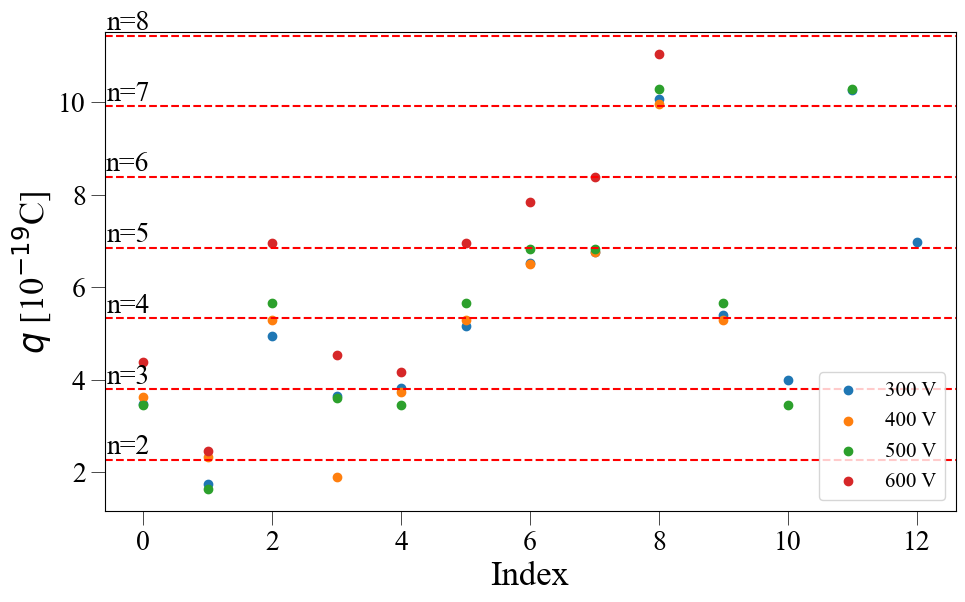

In [91]:
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel(r"Index")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$q$ [10$^{-19}$C]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
plt.tight_layout()  

ax.scatter(U_300.index, U_300['q']*10**19, label='300 V')
ax.scatter(U_400.index, U_400['q']*10**19, label='400 V')
ax.scatter(U_500.index, U_500['q']*10**19, label='500 V')
ax.scatter(U_600.index, U_600['q']*10**19, label='600 V')

# Original intervals
intervals = [[1.5, 2.6], [3.2, 4.2], [4.8, 5.8], [6.4, 7.4], [8.0, 9.0], [9.6, 10.6], [11.2, 12.2]]

# Calculate the total range covered by the intervals
total_range = max([interval[1] for interval in intervals]) - min([interval[0] for interval in intervals])

# Calculate the new interval size
new_interval_size = total_range / len(intervals)

# Create new intervals
new_intervals = [[min([interval[0] for interval in intervals]) + i * new_interval_size, 
                  min([interval[0] for interval in intervals]) + (i + 1) * new_interval_size] 
                 for i in range(len(intervals))]

# Calculate the mean of the new intervals
new_means = [np.mean(interval) for interval in new_intervals]

# Update the axhline and y_values
for i in range(len(intervals)):
    ax.axhline(y=new_means[i], color='r', linestyle='--')
    ax.text(0.1, new_means[i], f'n={i+2}', color='black', fontsize=20, va='bottom', ha='right')

ax.legend(loc='lower right', fontsize=15)
plt.show() 

fig.savefig('images/lvl.png', bbox_inches='tight')

In [92]:
q_all = pd.concat([U_300['q'], U_400['q'], U_500['q'], U_600['q']], ignore_index=True)
q_all = pd.DataFrame(q_all, columns=['q'])
q_all['q'] = q_all['q'] * 10**19


In [93]:
# Define the intervals and corresponding labels
intervals = new_intervals
labels = range(2, 9)

for interval, label in zip(intervals, labels):
    if q_all['q'].between(*interval).any():
        q_all.loc[q_all['q'].between(*interval), 'n'] = label

In [94]:
for U in U_list:
    U['q'] = U['q'] * 10**19
    for interval, label in zip(intervals, labels):
        if U['q'].between(*interval).any():
            U.loc[U['q'].between(*interval), 'n'] = label
    U['q'] = U['q'] * 10**-19

In [95]:
# Linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(q_all['n'], q_all['q'])

q = ufloat(slope, std_err)

print('q =', q)

#Best fit line 
q_fit = slope * np.array(q_all['n']) + intercept

q = 1.561+/-0.030


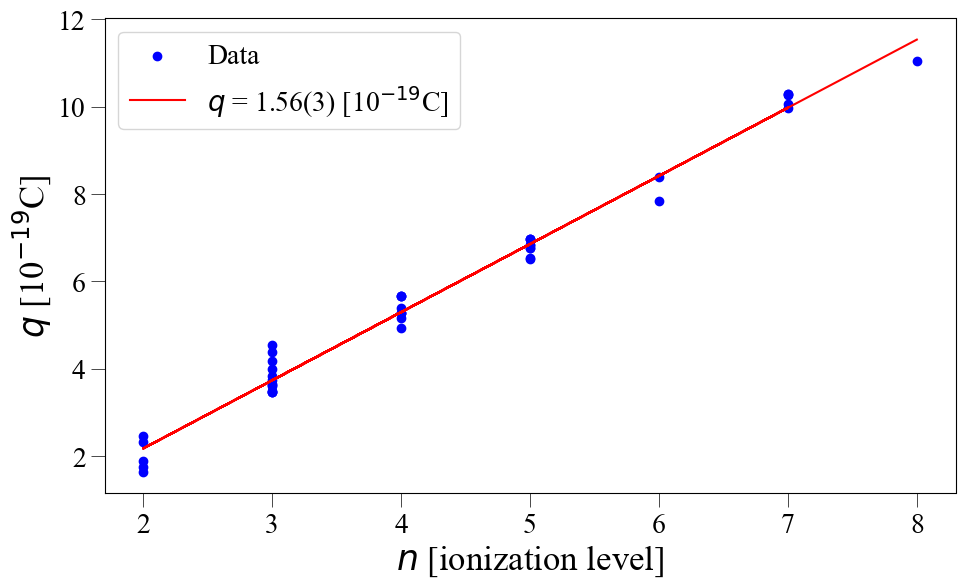

In [96]:
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$n$ [ionization level]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$q$ [10$^{-19}$C]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(q_all['n'], q_all['q'], color='blue', label='Data')
ax.plot(q_all['n'], q_fit, color='red', label=r'$q$ = 1.56(3) [10$^{-19}$C]')

ax.legend(loc='upper left', fontsize=20)


plt.show() 

fig.savefig('images/q.png', bbox_inches='tight')

In [97]:
U_300['q'] = U_300['q'] * 10**19
U_400['q'] = U_400['q'] * 10**19
U_500['q'] = U_500['q'] * 10**19
U_600['q'] = U_600['q'] * 10**19

In [98]:
U_300 = U_300.round(3)
U_400 = U_400.round(3)
U_500 = U_500.round(3)
U_600 = U_600.round(3)

U_300.to_csv('data/U_300.csv', index=False)
U_400.to_csv('data/U_400.csv', index=False)
U_500.to_csv('data/U_500.csv', index=False)
U_600.to_csv('data/U_600.csv', index=False)